# Data Analysis with Depression Data

## 1. Set up the environment

In [1]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [2]:
# Import necessary libraries

# Data Exploration and Preparation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df_ = pd.read_csv("/kaggle/input/depression-dataset/depression_data.csv")
df = df_.copy()

The dataset contains information about individuals' personal and lifestyle factors. More details about the columns can be found on the dataset's website: <br>
https://www.kaggle.com/datasets/anthonytherrien/depression-dataset

In [4]:
# Generate random NaN values
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

## 2. Data Exploration

In [5]:
# Show the first few rows to understand the data format
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31.0,Married,Bachelor's Degree,2.0,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55.0,Married,High School,1.0,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78.0,Widowed,Master's Degree,1.0,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58.0,Divorced,Master's Degree,3.0,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,NaN,No,No,No
4,Michael Rich,18.0,Single,High School,0.0,Non-smoker,Sedentary,Unemployed,8595.08,NaN,Moderate,Fair,Yes,No,Yes,Yes


In [6]:
# Display basic information about the dataset (columns, types, missing values, etc.)
print(df.info())
# Size of the dataframe (# of columns and rows)
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          401567 non-null  object 
 1   Age                           401585 non-null  float64
 2   Marital Status                401412 non-null  object 
 3   Education Level               401475 non-null  object 
 4   Number of Children            401473 non-null  float64
 5   Smoking Status                401494 non-null  object 
 6   Physical Activity Level       401697 non-null  object 
 7   Employment Status             401546 non-null  object 
 8   Income                        401577 non-null  float64
 9   Alcohol Consumption           401286 non-null  object 
 10  Dietary Habits                401666 non-null  object 
 11  Sleep Patterns                401569 non-null  object 
 12  History of Mental Illness     401754 non-nul

There are 16 columns in total.

In [7]:
# Identify categorical and numerical features using list comprehension
categorical_features = [col for col in df.columns if df[col].dtype in ["object", "category"]]
numerical_features = [col for col in df.columns if df[col].dtype not in ["object", "categorical"]]

In [8]:
categorical_features, numerical_features

(['Name',
  'Marital Status',
  'Education Level',
  'Smoking Status',
  'Physical Activity Level',
  'Employment Status',
  'Alcohol Consumption',
  'Dietary Habits',
  'Sleep Patterns',
  'History of Mental Illness',
  'History of Substance Abuse',
  'Family History of Depression',
  'Chronic Medical Conditions'],
 ['Age', 'Number of Children', 'Income'])

Now, we change the data type of some features since these features have a limited set of distinct values and should be converted to categorical.

In [9]:
# Create a list for columns to convert
columns_to_convert = [col for col in categorical_features if col != "Name"]

# Convert selected columns to 'category'
df[columns_to_convert] = df[columns_to_convert].astype("category")

# Verify the changes
print(df.dtypes)

Name                              object
Age                              float64
Marital Status                  category
Education Level                 category
Number of Children               float64
Smoking Status                  category
Physical Activity Level         category
Employment Status               category
Income                           float64
Alcohol Consumption             category
Dietary Habits                  category
Sleep Patterns                  category
History of Mental Illness       category
History of Substance Abuse      category
Family History of Depression    category
Chronic Medical Conditions      category
dtype: object


In [10]:
# Summarize numerical features (mean, min, max, etc.)
print(df.describe().T)

                       count          mean           std    min       25%  \
Age                 401585.0     48.999933     18.160828  18.00     33.00   
Number of Children  401473.0      1.298690      1.236892   0.00      0.00   
Income              401577.0  50656.512581  40626.241790   0.41  20988.84   

                         50%       75%        max  
Age                    49.00     65.00      80.00  
Number of Children      1.00      2.00       4.00  
Income              37508.45  76614.36  209995.22  


## 3. Data Cleaning and Preprocessing

### 3. 1. Handle Missing Values

In [11]:
# Check the missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Name                            12201
Age                             12183
Marital Status                  12356
Education Level                 12293
Number of Children              12295
Smoking Status                  12274
Physical Activity Level         12071
Employment Status               12222
Income                          12191
Alcohol Consumption             12482
Dietary Habits                  12102
Sleep Patterns                  12199
History of Mental Illness       12014
History of Substance Abuse      12255
Family History of Depression    12132
Chronic Medical Conditions      12351
dtype: int64


In [12]:
# Calculate the percentage of missing values in each column
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)

Name                            2.948754
Age                             2.944404
Marital Status                  2.986214
Education Level                 2.970989
Number of Children              2.971472
Smoking Status                  2.966397
Physical Activity Level         2.917335
Employment Status               2.953829
Income                          2.946337
Alcohol Consumption             3.016666
Dietary Habits                  2.924827
Sleep Patterns                  2.948271
History of Mental Illness       2.903559
History of Substance Abuse      2.961805
Family History of Depression    2.932078
Chronic Medical Conditions      2.985006
dtype: float64


In [13]:
# Calculate non missing values
non_missing_values = df.notnull().sum()
print(non_missing_values)
print(f"The dataset contains a total of {df.notnull().sum().sum()} non-missing and {df.isnull().sum().sum()} missing observations.")

Name                            401567
Age                             401585
Marital Status                  401412
Education Level                 401475
Number of Children              401473
Smoking Status                  401494
Physical Activity Level         401697
Employment Status               401546
Income                          401577
Alcohol Consumption             401286
Dietary Habits                  401666
Sleep Patterns                  401569
History of Mental Illness       401754
History of Substance Abuse      401513
Family History of Depression    401636
Chronic Medical Conditions      401417
dtype: int64
The dataset contains a total of 6424667 non-missing and 195621 missing observations.


In [14]:
# Let's look at records that do not have any missing values.
df[df.notnull().all(axis=1)]

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31.0,Married,Bachelor's Degree,2.0,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55.0,Married,High School,1.0,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78.0,Widowed,Master's Degree,1.0,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
7,Charles Kaiser,31.0,Single,High School,0.0,Non-smoker,Active,Employed,39608.18,Moderate,Unhealthy,Good,No,No,No,No
9,Alexander Hernandez,77.0,Married,Bachelor's Degree,2.0,Non-smoker,Sedentary,Employed,77597.84,Low,Unhealthy,Poor,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413759,Travis Brewer,20.0,Single,Bachelor's Degree,0.0,Current,Sedentary,Employed,54483.50,Moderate,Unhealthy,Good,No,No,No,No
413760,Sophia Allen,46.0,Married,High School,1.0,Non-smoker,Sedentary,Employed,26153.32,Low,Unhealthy,Poor,Yes,No,No,Yes
413762,Janice Robertson,28.0,Single,Bachelor's Degree,0.0,Non-smoker,Active,Unemployed,5971.27,Moderate,Moderate,Fair,Yes,Yes,No,No
413766,Gary Faulkner,71.0,Married,Associate Degree,2.0,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No


In [15]:
# Count the number of individuals (rows) that do not have any NaN values
non_missing_count = df[df.notnull().all(axis=1)].shape[0]
print(f"Number of individuals with no missing values: {non_missing_count}")

Number of individuals with no missing values: 256186


**shape[0]** gives the number of rows in the filtered DataFrame.

In [16]:
# Check if there is an observation where all values are missing
df.dropna(how = 'all', inplace = False)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31.0,Married,Bachelor's Degree,2.0,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55.0,Married,High School,1.0,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78.0,Widowed,Master's Degree,1.0,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58.0,Divorced,Master's Degree,3.0,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,NaN,No,No,No
4,Michael Rich,18.0,Single,High School,0.0,Non-smoker,Sedentary,Unemployed,8595.08,NaN,Moderate,Fair,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,Sean Miller,68.0,Married,Master's Degree,0.0,Former,Moderate,Employed,109233.43,Low,NaN,Good,No,No,No,No
413764,Christina Brown,26.0,Single,Bachelor's Degree,NaN,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Matthew Jenkins,57.0,NaN,Bachelor's Degree,0.0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Gary Faulkner,71.0,Married,Associate Degree,2.0,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No


We observed earlier that there are 413,768 individuals by using df.shape. After excluding the rows where all values are missing, we still have 413,768 rows, which means there are no observations with all values missing.

In [17]:
df_.isnull().sum()

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

There is no missing values in the original dataset. Therefore, dropping missing values is not evaluated in this project.

#### 3. 1. 1. Imputing Missing Data

**Distribution of Numerical Features**

In this section, we visualize the distributions of three key numerical features in the dataset: **Age**, **Income**, and **Number of Children**.

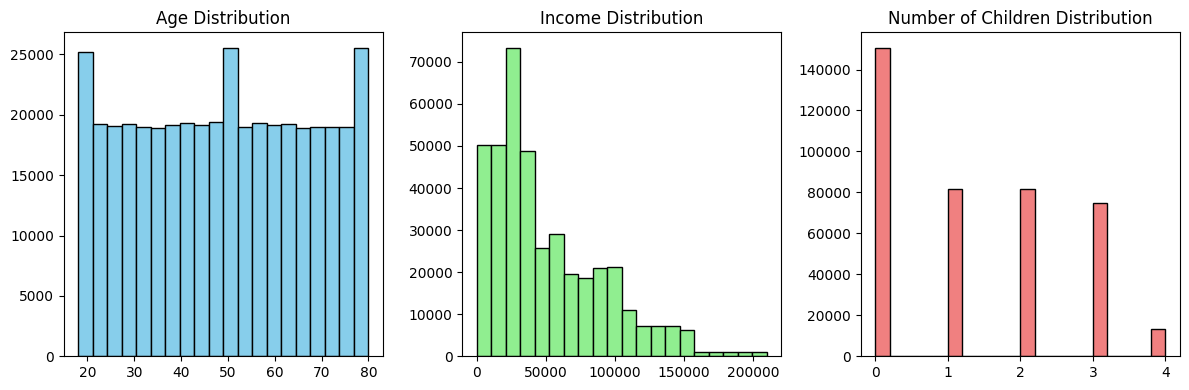

In [18]:
# Let's see the distributions of numerical features
plt.figure(figsize=(12, 4))

# Plot for "Age"
plt.subplot(1, 3, 1)
plt.hist(df["Age"], bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution")

# Plot for "Income" (or any other numerical column you have)
plt.subplot(1, 3, 2)
plt.hist(df["Income"], bins=20, color='lightgreen', edgecolor='black')
plt.title("Income Distribution")

# Plot for "Number of Children" (or another numerical feature)
plt.subplot(1, 3, 3)
plt.hist(df["Number of Children"], bins=20, color='lightcoral', edgecolor='black')
plt.title("Number of Children Distribution")

# Show the plots
plt.tight_layout()
plt.show()

### Distribution Observations:

1. **Age Distribution**:
   - The age distribution appears balanced, with values spread uniformly from ages 18 to 80.
   - Notable increases in the number of individuals are observed at the boundaries (ages 18 and 80), indicating slightly higher counts compared to other ages.

2. **Income Distribution**:
   - The income distribution shows a clear right-skewed pattern.
   - Most individuals fall into the lower-income ranges, while only a few have significantly higher incomes.

3. **Number of Children**:
   - The distribution decreases from 0 to 4 children.
   - A sharp peak is observed at 0 children, indicating that most individuals do not have children.
   - The frequencies for individuals with 1, 2, and 3 children are nearly identical, while very few have 4 children.


In [19]:
# Create a copy to fill missing values
df_fillna = df.copy()
df_fillna.head(5)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31.0,Married,Bachelor's Degree,2.0,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55.0,Married,High School,1.0,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78.0,Widowed,Master's Degree,1.0,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58.0,Divorced,Master's Degree,3.0,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,NaN,No,No,No
4,Michael Rich,18.0,Single,High School,0.0,Non-smoker,Sedentary,Unemployed,8595.08,NaN,Moderate,Fair,Yes,No,Yes,Yes


#### Impute the missing values for Age
To mimic the distribution, let's consider random imputation.

In [20]:
import random
df_fillna['Age'] = df_fillna['Age'].apply(lambda x: random.randint(18, 80) if pd.isnull(x) else x)

#### Impute the missing values for Income
Firstly, we consider imputing missing values based on income groups, if it correlates with income.

In [21]:
# Group income statistics by Employment Status in df_fillna
income_by_employment = df_fillna.groupby("Employment Status")["Income"].describe()
print(income_by_employment)

                      count          mean           std       min         25%  \
Employment Status                                                               
Employed           250062.0  70541.836662  37763.051923  22500.65  39056.0750   
Unemployed         139630.0  15037.236879   8662.480999      0.41   7555.4375   

                        50%         75%        max  
Employment Status                                   
Employed           61522.05  94869.7475  209995.22  
Unemployed         15059.30  22549.9500   29999.88  


/tmp/ipykernel_23/2730003720.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_employment = df_fillna.groupby("Employment Status")["Income"].describe()


Based on the summary statistics, there appears to be a strong relationship between Employment Status and Income:

- Employed individuals have a significantly higher mean income (\~70,542) compared to Unemployed individuals (\~15,037).
- The income distribution of employed individuals has a wider spread, with a standard deviation of \~37,763, compared to \~8,662 for the unemployed group.
- The median income for employed individuals (\~61,522) is much higher than that for unemployed individuals (\~15,059).

Therefore, imputing missing Income values based on Employment Status is a logical choice.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


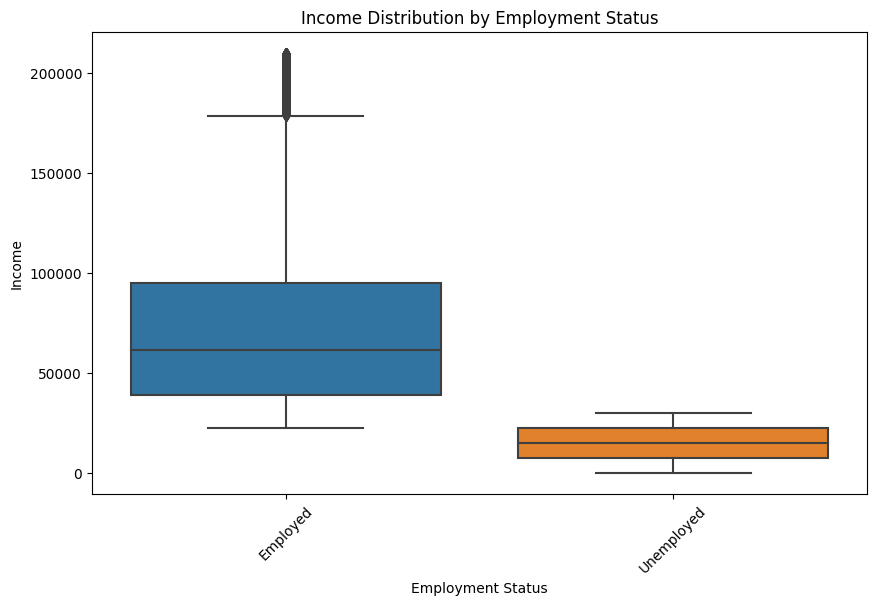

In [22]:
# Let's see the correlation as boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Employment Status", y="Income", data=df_fillna)
plt.title("Income Distribution by Employment Status")
plt.xticks(rotation=45)
plt.show()

HOWEVER, there are outliers in the income distribution of employed individuals. It could be a potential concern when imputing missing values by employment status. This could lead to imputations that are biased towards the higher end of the income scale.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default o

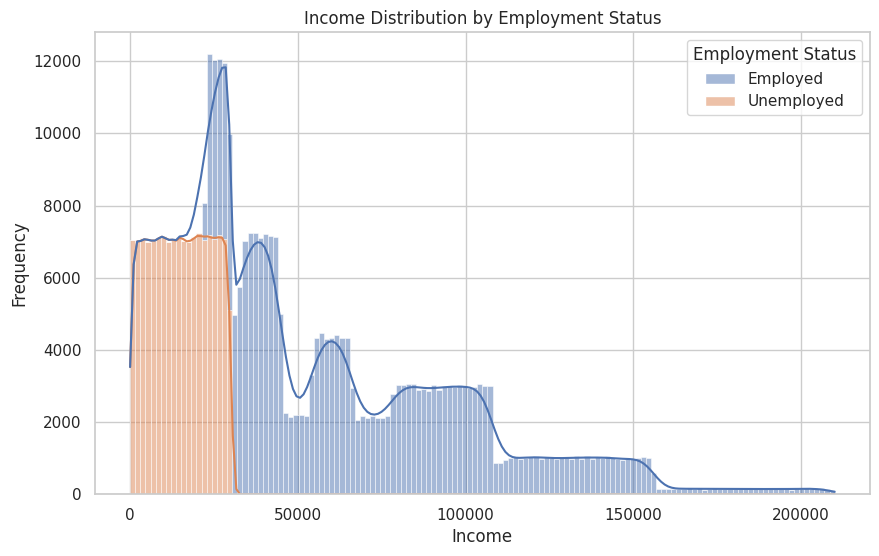

In [23]:
# Let's see the distribution of income by Employment Status
# Set the style for the plot
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the distribution of income by employment status
sns.histplot(data=df_fillna, x='Income', hue='Employment Status', multiple="stack", kde=True)

# Add labels and title
plt.title('Income Distribution by Employment Status')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Based on the analysis of the income distribution for **Employed** and **Unemployed** individuals, it is evident that these two groups have distinct income patterns. To handle the missing income values, we will impute them using the **median income** for each group.

**Why Use Median:**
- The **median** is robust to outliers, meaning it won’t be skewed by extreme income values, making it a reliable statistic for imputing missing data.
- By using different medians for the **Employed** and **Unemployed** groups, we ensure that each group's income distribution is respected, preserving the natural differences between the groups.

In [24]:
# Imputing missing 'Income' values by median for 'Employed' and 'Unemployed' groups
df_fillna['Income'] = df_fillna.groupby('Employment Status', observed=False)['Income'].transform(
    lambda x: x.fillna(x.median())
)

#### Impute the missing values for Number of Children

In [25]:
# Use random imputation proportional to the distribution

# Define probabilities based on observed distribution
prob_dist = df_fillna['Number of Children'].value_counts(normalize=True)
df_fillna['Number of Children'] = df_fillna['Number of Children'].apply(
    lambda x: np.random.choice(prob_dist.index, p=prob_dist.values) if pd.isnull(x) else x
)

In [26]:
# Let's check the missing values of numerical features again!

df_fillna.isnull().sum()

Name                            12201
Age                                 0
Marital Status                  12356
Education Level                 12293
Number of Children                  0
Smoking Status                  12274
Physical Activity Level         12071
Employment Status               12222
Income                          12222
Alcohol Consumption             12482
Dietary Habits                  12102
Sleep Patterns                  12199
History of Mental Illness       12014
History of Substance Abuse      12255
Family History of Depression    12132
Chronic Medical Conditions      12351
dtype: int64

In [27]:
# Check for NaN or infinite values in 'Income'
df_fillna[df_fillna['Income'].isnull() | df_fillna['Income'].isin([float('inf'), -float('inf')])]


,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
8,Kathryn Taylor,50.0,Divorced,Bachelor's Degree,0.0,Non-smoker,Active,NaN,NaN,Moderate,Healthy,Good,No,Yes,No,Yes
61,Jason Lester,56.0,NaN,Bachelor's Degree,2.0,Non-smoker,Moderate,NaN,NaN,NaN,Healthy,Poor,No,No,No,No
122,Jeanette Rodriguez,71.0,Widowed,High School,2.0,Non-smoker,Sedentary,NaN,NaN,High,Unhealthy,Fair,Yes,No,Yes,No
137,George Torres,70.0,Widowed,High School,0.0,Former,Moderate,NaN,NaN,Moderate,Moderate,Fair,Yes,No,No,Yes
138,Ryan Gutierrez,28.0,Single,Bachelor's Degree,0.0,Current,Active,NaN,NaN,High,Unhealthy,Poor,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413594,Lorraine Stanley,31.0,Married,High School,2.0,Non-smoker,Active,NaN,NaN,Moderate,Moderate,Poor,No,No,No,No
413601,Ian Murray,80.0,Widowed,Bachelor's Degree,0.0,Non-smoker,Sedentary,NaN,NaN,Moderate,Moderate,Poor,No,Yes,Yes,No
413620,David Garcia,20.0,Married,PhD,0.0,Former,Moderate,NaN,NaN,Moderate,Healthy,Fair,No,Yes,No,Yes
413664,Sarah Guerrero,22.0,Married,High School,0.0,Former,Sedentary,NaN,NaN,High,Unhealthy,Good,No,No,No,No


It looks like the issue may be that Income and Employment Status have missing values in the same rows, so when we're trying to impute missing Income values based on Employment Status, the Employment Status is also missing in those rows. Since Employment Status is required for grouping, rows with missing values in both Income and Employment Status would not be imputed properly.

To adress this, let's first check how many rows have missing values in both Income and Employment Status.

In [28]:
# Check rows where both 'Income' and 'Employment Status' are missing
missing_income_employment = df_fillna[df_fillna['Income'].isnull() & df_fillna['Employment Status'].isnull()]
print(missing_income_employment)

                      Name   Age Marital Status    Education Level  \
8           Kathryn Taylor  50.0       Divorced  Bachelor's Degree   
61            Jason Lester  56.0            NaN  Bachelor's Degree   
122     Jeanette Rodriguez  71.0        Widowed        High School   
137          George Torres  70.0        Widowed        High School   
138         Ryan Gutierrez  28.0         Single  Bachelor's Degree   
...                    ...   ...            ...                ...   
413594    Lorraine Stanley  31.0        Married        High School   
413601          Ian Murray  80.0        Widowed  Bachelor's Degree   
413620        David Garcia  20.0        Married                PhD   
413664      Sarah Guerrero  22.0        Married        High School   
413751      Cynthia Murphy  34.0        Married    Master's Degree   

        Number of Children Smoking Status Physical Activity Level  \
8                      0.0     Non-smoker                  Active   
61                   

If the Employment Status is missing, it might be better to impute it first before imputing Income.

In [29]:
df_fillna['Employment Status'].mode()

0    Employed
Name: Employment Status, dtype: category
Categories (2, object): ['Employed', 'Unemployed']

In [30]:
# Impute 'Employment Status' based on mode (most frequent value)
df_fillna['Employment Status'] = df_fillna['Employment Status'].fillna(df_fillna['Employment Status'].mode()[0])

In [31]:
# Impute 'Income' based on the median income of 'Employment Status' groups
df_fillna['Income'] = df_fillna.groupby('Employment Status')['Income'].transform('median')

/tmp/ipykernel_23/1194069477.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fillna['Income'] = df_fillna.groupby('Employment Status')['Income'].transform('median')


In [32]:
# Check if there are still missing values for 'Income'
print(df_fillna['Income'].isnull().sum())

0


In [33]:
df_fillna.isnull().sum()

Name                            12201
Age                                 0
Marital Status                  12356
Education Level                 12293
Number of Children                  0
Smoking Status                  12274
Physical Activity Level         12071
Employment Status                   0
Income                              0
Alcohol Consumption             12482
Dietary Habits                  12102
Sleep Patterns                  12199
History of Mental Illness       12014
History of Substance Abuse      12255
Family History of Depression    12132
Chronic Medical Conditions      12351
dtype: int64

## Imputation for rest of features

In [34]:
# Loop through all columns and display value counts for categorical columns
categorical_columns = df_fillna.select_dtypes(include=['category']).columns

for column in categorical_columns:
    print(f"Distribution for {column}:")
    print(df_fillna[column].value_counts())
    print("\n")

Distribution for Marital Status:
Marital Status
Married     233247
Single       69946
Widowed      66446
Divorced     31773
Name: count, dtype: int64


Distribution for Education Level:
Education Level
Bachelor's Degree    120693
High School          115364
Associate Degree      77636
Master's Degree       71541
PhD                   16241
Name: count, dtype: int64


Distribution for Smoking Status:
Smoking Status
Non-smoker    240153
Former        112691
Current        48650
Name: count, dtype: int64


Distribution for Physical Activity Level:
Physical Activity Level
Sedentary    171762
Moderate     153311
Active        76624
Name: count, dtype: int64


Distribution for Employment Status:
Employment Status
Employed      269967
Unemployed    143801
Name: count, dtype: int64


Distribution for Alcohol Consumption:
Alcohol Consumption
Moderate    168190
Low         135007
High         98089
Name: count, dtype: int64


Distribution for Dietary Habits:
Dietary Habits
Unhealthy    165765
Mo

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


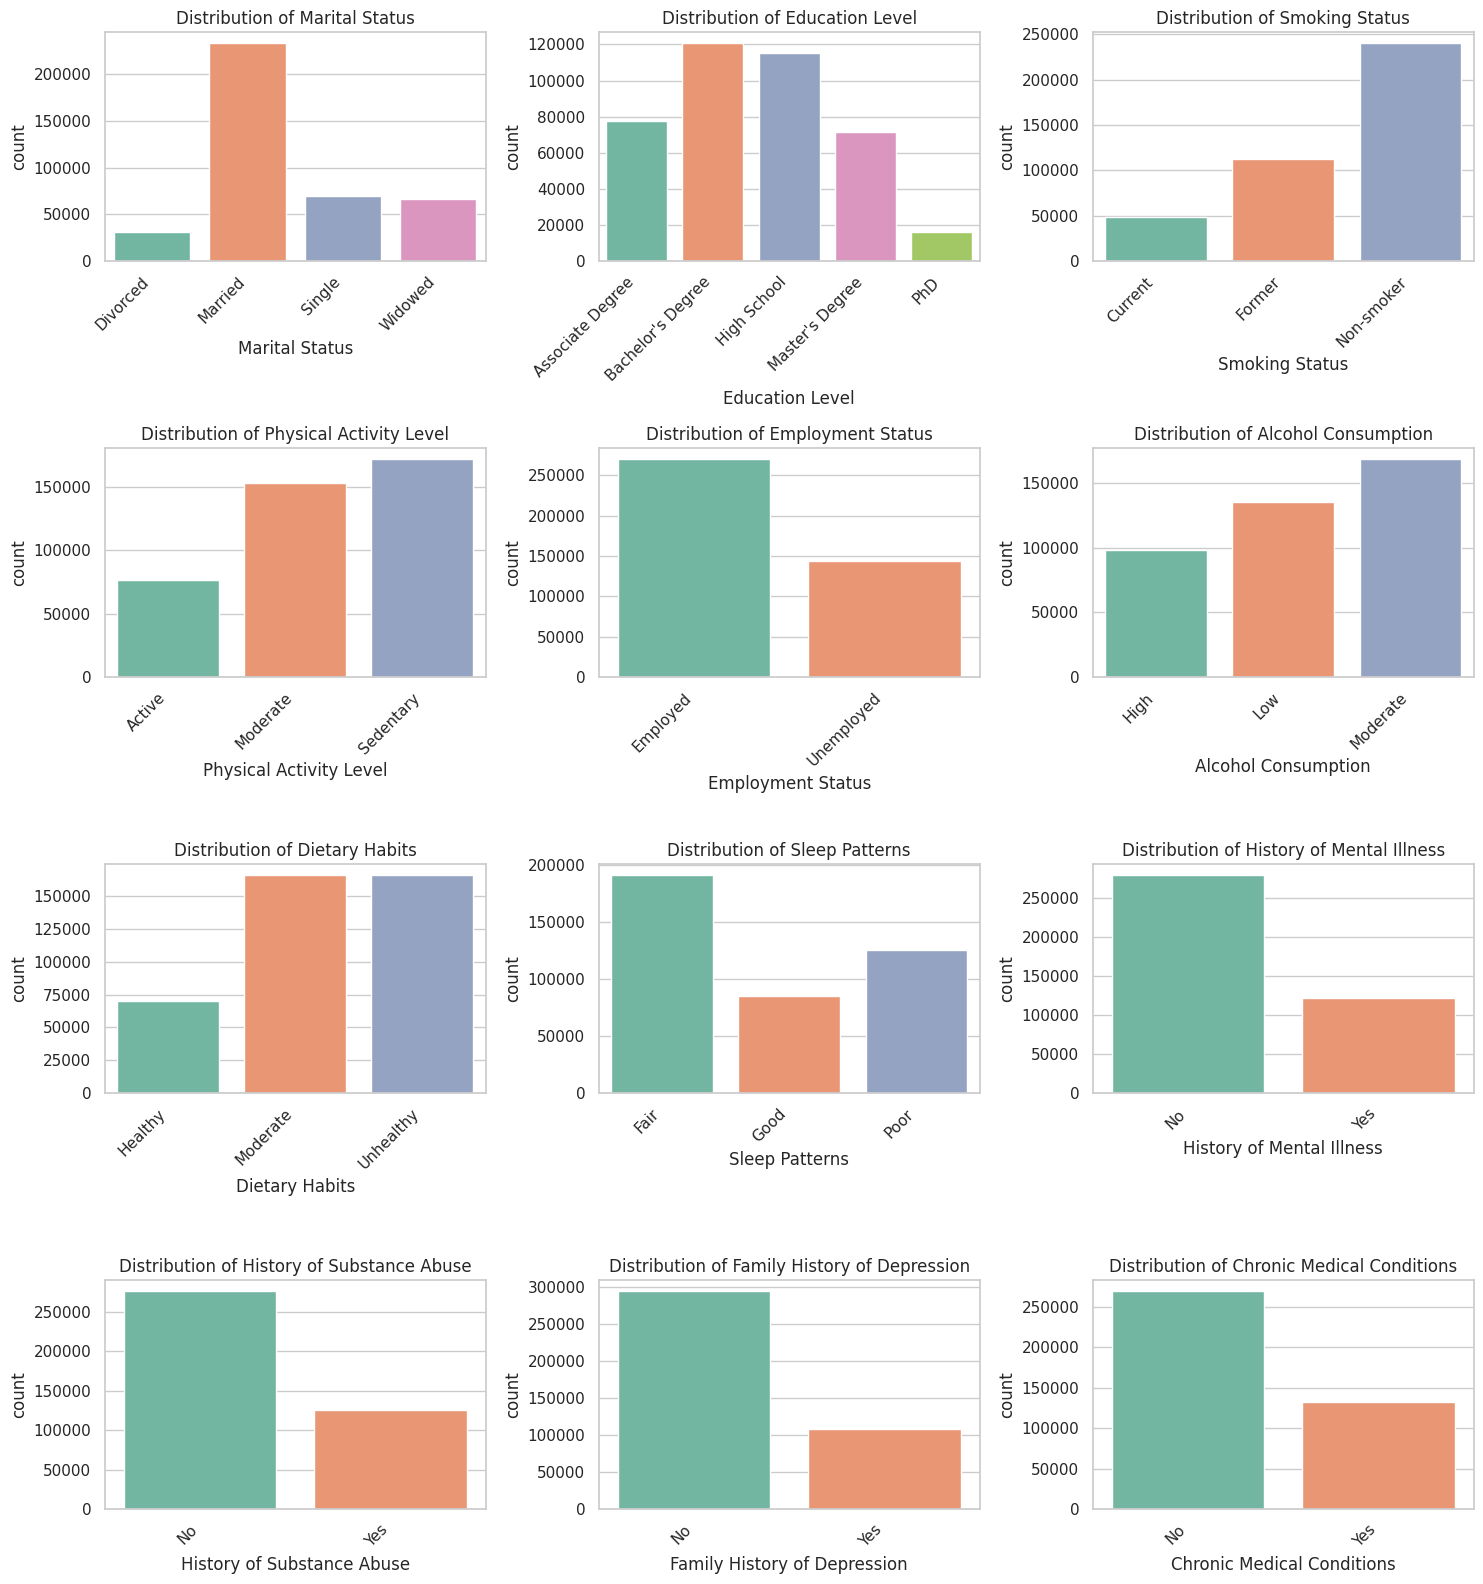

In [35]:
import math

# Set up the plot size
num_columns = len(categorical_columns)
num_rows = math.ceil(num_columns / 3)  # Adjust number of rows to fit all plots

plt.figure(figsize=(15, num_rows * 4))

# Loop through all categorical columns and plot the distributions
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, 3, i)  # Adjust the subplot grid dynamically
    sns.countplot(data=df_fillna, x=column, palette='Set2')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

We use mode imputation for imbalanced features and random sampling for balanced features.

**Imputation Logic**
1. Mode Imputation
   - For features with a dominant category
2. Random Sampling Imputation
   - For features with more balanced distributions

In [36]:
# List of features for mode and random sampling imputations
mode_imputation_features = [
    "Marital Status", "Smoking Status", 
    "History of Substance Abuse", "Family History of Depression", 
    "Chronic Medical Conditions", "History of Mental Illness"
]

random_sampling_features = [
    "Physical Activity Level", "Education Level", "Alcohol Consumption", 
    "Dietary Habits", "Sleep Patterns"
]

# Mode imputation
for column in mode_imputation_features:
    mode_value = df_fillna[column].mode()[0]  # Get the most frequent value
    df_fillna[column].fillna(mode_value, inplace=True)

# Random sampling imputation
for column in random_sampling_features:
    missing_indices = df_fillna[column].isnull()  # Identify missing rows
    observed_values = df_fillna.loc[~missing_indices, column]  # Non-missing values
    sampled_values = np.random.choice(observed_values, size=missing_indices.sum(), replace=True)
    df_fillna.loc[missing_indices, column] = sampled_values

# Verify if all missing values are filled
print(df_fillna.isnull().sum())

Name                            12201
Age                                 0
Marital Status                      0
Education Level                     0
Number of Children                  0
Smoking Status                      0
Physical Activity Level             0
Employment Status                   0
Income                              0
Alcohol Consumption                 0
Dietary Habits                      0
Sleep Patterns                      0
History of Mental Illness           0
History of Substance Abuse          0
Family History of Depression        0
Chronic Medical Conditions          0
dtype: int64


/tmp/ipykernel_23/2817901283.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna[column].fillna(mode_value, inplace=True)


### 3. 2. Outlier Value Analysis

Depression data includes 3 numerical features. Let's consider them.

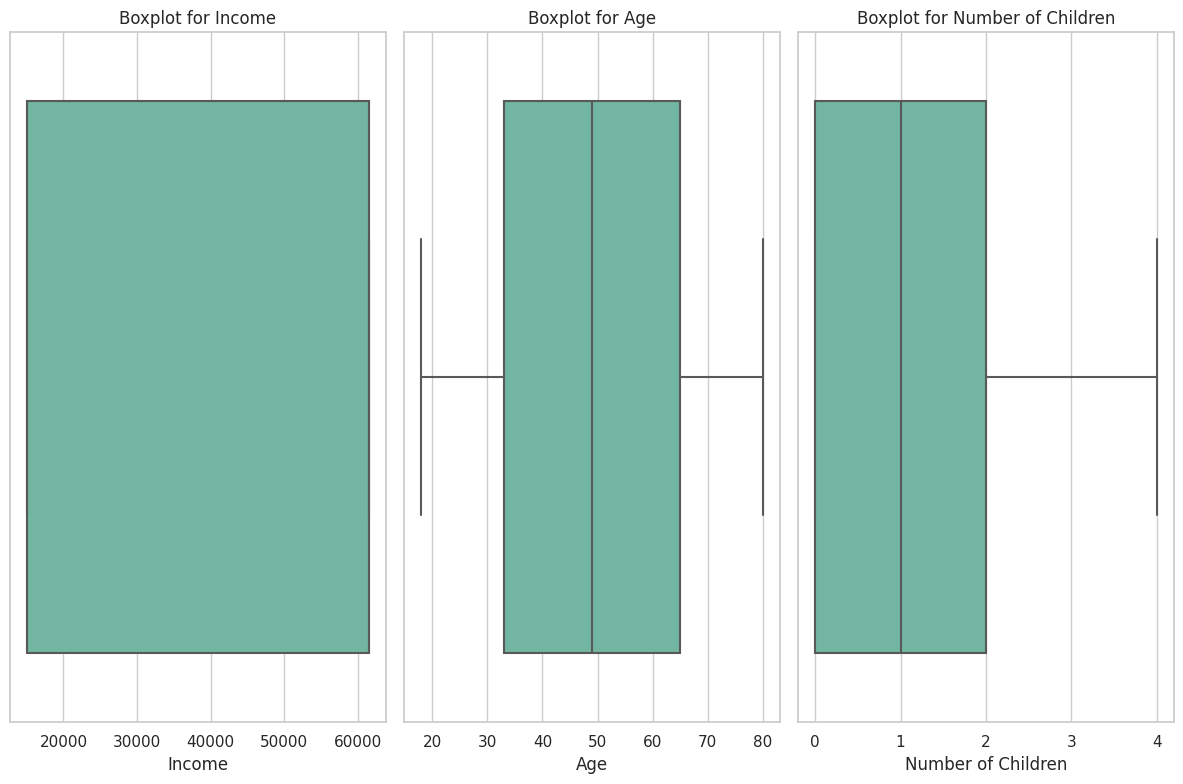

In [37]:
# List of numerical columns to check for outliers
numerical_columns = ['Income', 'Age', 'Number of Children']

# Create a larger grid of boxplots for better comparison
plt.figure(figsize=(12, 8))

# Loop through numerical columns and plot horizontally
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)  # Adjust grid to have 1 row and 3 columns
    sns.boxplot(data=df_fillna, x=col, palette='Set2')
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()

plt.show()

In [38]:
# Outlier detection using IQR for numerical columns
numerical_columns = ['Income', 'Age', 'Number of Children']

# Calculate IQR and define outliers for each column
outliers = {}

for col in numerical_columns:
    Q1 = df_fillna[col].quantile(0.25)
    Q3 = df_fillna[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers[col] = df_fillna[(df_fillna[col] < lower_bound) | (df_fillna[col] > upper_bound)]
    
    print(f"Outliers in {col}:")
    print(outliers[col][col])
    print(f"Total number of outliers in {col}: {outliers[col].shape[0]}")

Outliers in Income:
Series([], Name: Income, dtype: float64)
Total number of outliers in Income: 0
Outliers in Age:
Series([], Name: Age, dtype: float64)
Total number of outliers in Age: 0
Outliers in Number of Children:
Series([], Name: Number of Children, dtype: float64)
Total number of outliers in Number of Children: 0


The change in the maximum value for Income can be attributed to imputing missing values, which replaces NaN entries with reasonable values like the median. As a result, extreme outliers were effectively removed, leading to a decrease in the overall maximum.

## 4. Feature Engineering and Analysis

In [39]:
df_fe = df_fillna.copy()

1. We can create Depression Risk and Healthy Lifestyle Score columns.

**Healthy Lifestyle Score**: This column can be based on lifestyle habits such as Physical Activity Level, Dietary Habits, Smoking Status, and Alcohol Consumption. A scoring system can be created where:

- Higher physical activity levels and better dietary habits increase the score.
- Smoking and alcohol consumption would decrease the score.

In [40]:
def healthy_lifestyle_score(row):
    score = 0
    if row["Physical Activity Level"] == "Active": score += 2
    if row["Dietary Habits"] == "Healthy": score += 2
    if row["Smoking Status"] == "Non-smoker": score += 2
    if row["Alcohol Consumption"] == "Low": score += 2
    if row['Sleep Patterns'] == 'Good': score += 2
    return score

df_fe["Healthy Lifestyle Score"] = df_fe.apply(healthy_lifestyle_score, axis=1)

In [41]:
df_fe["Healthy Lifestyle Score"].unique()

array([ 4,  2,  6,  8,  0, 10])

**Depression Risk**: This column can represent the likelihood of depression based on factors like History of Mental Illness and Family History of Depression. 
We can also consider the Healty Lifestyle Score because lifestyle factors often influence mental health.
- High Depression Risk:
  * History of Mental Illness = Yes
  * Family History of Depression = Yes
  * If an individual has a low Healthy Lifestyle Score (i.e., poor physical activity, smoking, high alcohol consumption), they may be at a higher risk for depression.

In [42]:
# Create Depression Risk based on History of Mental Illness, Family History of Depression, and Healthy Lifestyle Score
def depression_risk(row):
    # Start with a risk factor based on history of mental illness or family history of depression
    risk = 0
    if (row['History of Mental Illness'] == 'Yes') or (row['Family History of Depression'] == 'Yes'):
        risk = 1
    
    # Now incorporate the Healthy Lifestyle Score: if score is low, increase depression risk
    if row['Healthy Lifestyle Score'] <= 4:  # Let's assume 4 or below is considered unhealthy
        risk = 1  # Higher risk
    
    return risk

# Apply the function to create the Depression Risk column
df_fe['Depression Risk'] = df_fe.apply(depression_risk, axis=1)

In [43]:
df_fe["Depression Risk"].unique()

array([1, 0])

2. Let's test if smoking status is associated with family history of depression. We use chi-square test. <br>
**Chi-Square Test**: To check if there is a significant association between Smoking Status and Family History of Depression.

In [44]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_fillna['Smoking Status'], df_fillna['Family History of Depression'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f'Chi-Square Test p-value: {p_value}')

Chi-Square Test p-value: 2.976627317364588e-126


The p-value is extremely small, which indicates a very strong statistical significance in the relationship between Smoking Status and Family History of Depression. This suggests that people who have a family history of depression may be more likely to have a certain smoking status, or vice versa.

Let's visualize the relationship using a stacked bar chart to show how the different smoking statuses are distributed across the categories of family history of depression.

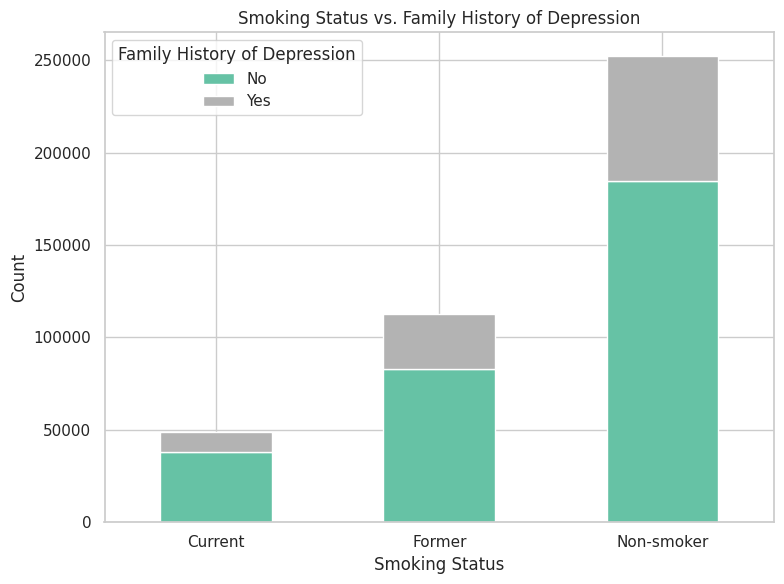

In [45]:
# Create a contingency table
contingency_table = pd.crosstab(df_fe['Smoking Status'], df_fe['Family History of Depression'])

# Plot the stacked bar chart
ax = contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')
ax.set_title('Smoking Status vs. Family History of Depression')
ax.set_xlabel('Smoking Status')
ax.set_ylabel('Count')
ax.legend(title='Family History of Depression', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

3. Let's create a new column as "Family" combining Marital Status and Number of Children.

In [46]:
def family_status(row):
    if row['Marital Status'] == 'Married' and row['Number of Children'] > 0:
        return 'Married with children'
    elif row['Marital Status'] == 'Married' and row['Number of Children'] == 0:
        return 'Married without children'
    else:
        return 'Single'

df_fe['Family Status'] = df_fe.apply(family_status, axis=1)

In [47]:
df_fe["Family Status"].unique()

array(['Married with children', 'Single', 'Married without children'],
      dtype=object)

Let's see the relationship between Family Status and Depression Risk.

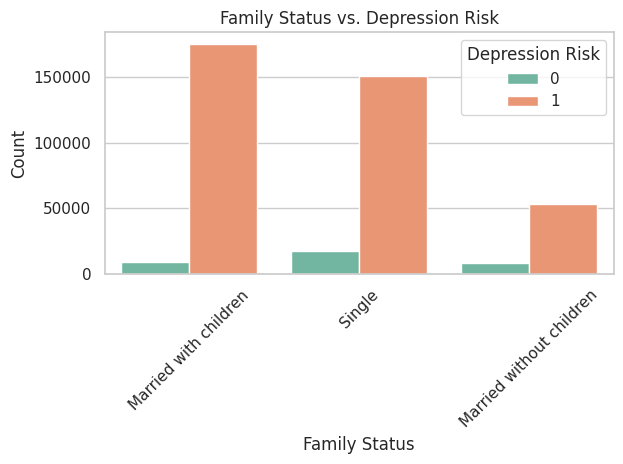

In [48]:
sns.countplot(data=df_fe, x='Family Status', hue='Depression Risk', palette='Set2')
plt.title('Family Status vs. Depression Risk')
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The analysis of the relationship between family status and depression risk revealed the following key observations:

* **Married with children** individuals have the highest **depression risk** compared to other family statuses. This suggests that being married with children might correlate with higher levels of stress or responsibilities, which could contribute to an increased risk of depression.
* **Single** individuals are the second highest in terms of **depression risk**. This could reflect social isolation or challenges related to being single, which may contribute to mental health struggles.
* **Married without children** individuals have the lowest **depression risk**, which may indicate that the absence of children, along with the support system of a marital relationship, may provide a more stable and less stressful environment.

These findings provide insight into how different family structures might be linked to varying levels of depression risk. Further analysis, including additional factors such as income, health conditions, and mental health history, would be beneficial to understand the underlying causes of these trends.

## 5. Results and Recommendations

In this project, the analysis we conducted highlighted the relationship between depression risk and healthy lifestyle factors, providing significant insights for data-driven solutions in the healthcare sector. Specifically, the relationship between depression risk and demographic factors, such as family status, presents important findings for targeted group interventions and service design.

#### **1. Potential Application Areas of the Data:**

- **Healthcare and Psychological Support Services:**
  Based on depression risk and factors like family status and lifestyle, individuals can be better targeted for interventions. For instance, the observation that individuals in the **"married with children"** category exhibit higher depression risk suggests that family counseling services might be more effective for this group. Additionally, these findings could inform the design of personalized mental health programs based on individuals' lifestyle and health habits.

- **Strategic Decision Support in Companies:**
  Depression risk data could be useful for companies aiming to make strategic decisions regarding employee health. The relationship between **family status** and **lifestyle** factors and depression risk could assist in targeting workplace health initiatives. For example, programs that promote a healthy lifestyle or provide family support could be implemented for employees.

#### **2. Suggested ML Models:**

For analyzing depression risk and healthy lifestyle data, we recommend using **classification algorithms** and **decision trees** in machine learning. Specifically, **Random Forest** or **Gradient Boosting** methods could be effective at modeling the complexity and heterogeneity of the data. These algorithms can be particularly useful in predicting depression risk based on various features.

**Why These Models?**

- **Random Forest and Gradient Boosting:**
  These ensemble methods provide high accuracy and generalization, especially when working with complex and interacting data. These models would effectively capture the relationships between features like family status, lifestyle habits, and depression risk.

- **Logistic Regression:**
  Another option for classification is **logistic regression**, which could work well if the depression risk is represented as a binary classification (e.g., "Risky" vs. "Not Risky"). While logistic regression offers faster results and is more interpretable, it may have limitations in modeling complex interactions.

#### **Conclusion:**

This project has provided valuable insights into the relationship between depression risk and healthy lifestyle factors. The findings suggest that demographic factors, such as **family status** and **lifestyle habits**, play a significant role in depression risk, and this information can be used to inform health policies and interventions. 

**Recommendations:**
1. Collect and analyze more data related to depression risk to improve prediction accuracy.
2. Explore advanced machine learning techniques (e.g., deep learning) to uncover more complex interactions and factors.
3. Design health programs or counseling services for high-risk groups based on the findings to offer tailored psychological support.

These recommendations guide how the findings from this analysis can be applied both clinically and within corporate wellness programs.